<a href="https://colab.research.google.com/github/kennyg37/data-preprocessing/blob/main/ml_pipeline_Ken_Ganza_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Kemo Initiative

## Student Name: Ken Ganza

---

1. **Data Sources and Aggregation:**
   - Kaggle datasets
   - Google Datasets
   - Since my project involves creating simulations of the situation/scenario a user entered any dataset will work but for training we will train the model on various datasets multiclass or uniclass classification datasets
   -Self-compiled datasets since it is hard to get a pre-built dataset that fits my conditions

   
   **Determine if data aggregation from multiple sources is necessary for comprehensive analysis.**
   - It will be necessary because most of the datasets i find do not match the type of dataset i want
   
   Hypothetically, a user let's call him Kwizera wants to test which of his three products will be successful to facilite decision making. Now i would never get a pre-compiled dataset that will predict accurately which product is suitable for Kwizera hence a new generated dataset from a questionaire Kwizera can fill or more from Kwizera.

   In my case i have narrowed my focus to leaders. We will facilitate leaders by running their decisions through our models and predict the chances of the decisions failing

   I can conclude that data aggregation from multiple sources will be necessary

   



## Dataset creation

For this project since it was hard to get a working dataset i decided to create mine. The dataset created will have a random but logistic factor to make the dataset a valuable one

the dataset created illustrates the educational data in three districts from Kigali namely Gasabo, Kicukiro and Nyarugenge. This datasets has 1000 test instances that mean 1000 tests taken and how the districts performed. This district is suitable for a classification task as a leader can put the number of student they want to succeed and the number of teachers at hand and the model will identify the district likely to make that happen.



In [6]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

n_samples = 1000 
n_features = 3   
n_classes = 3   

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=3,
    n_redundant=0,
    n_classes=n_classes,
    n_clusters_per_class=1,
    random_state=42
)

X[:, 0] = np.abs(X[:, 0] * 100).astype(int) + 50 
X[:, 1] = np.abs(X[:, 1] * 10).astype(int) + 10   
X[:, 2] = X[:, 0] + np.random.randint(10, 100, size=n_samples).astype(int)

df = pd.DataFrame(X, columns=["students_passed", "num_teachers", "total_students"])
df = df.astype(int)
df['district_label'] = y  

district_mapping = {0: "Kicukiro", 1: "Gasabo", 2: "Nyarugenge"}
df['district_label'] = df['district_label'].map(district_mapping)

df.to_csv("data/district_classification_dataset.csv", index=False)

print(df.head())


   students_passed  num_teachers  total_students district_label
0              109            33             144     Nyarugenge
1              241            23             330     Nyarugenge
2              188            24             222         Gasabo
3              179            20             226       Kicukiro
4              104            11             191       Kicukiro


### **Data Format Transformation:**
- **Current Format**: The data is in a tabular format with columns representing features (`students_passed`, `num_teachers`, `total_students`) and the target (`district_label`). The features are numerical, and the target is categorical.
- **Planned Transformation**: 
  - Convert categorical target labels into encoded numerical values suitable for model training.
  - Normalize numerical features (`students_passed`, `num_teachers`, `total_students`) to ensure consistency and scale across features.

### **Data Exploration:**
- **Features Included**:
  1. `students_passed`: The number of students who passed exams.
  2. `num_teachers`: The number of teachers in the district.
  3. `total_students`: The total number of students in the district.
  4. `district_label`: The target label representing the district (`Kicukiro`, `Gasabo`, `Nyarugenge`).

- **Findings from EDA**:
  - The distribution of `students_passed` shows a right-skewed pattern, indicating higher counts in some districts.
  - `total_students` correlates positively with `students_passed`, suggesting larger districts may have better results.
  - District labels are relatively balanced, though some minor imbalances exist.
  - Outliers were observed in the `num_teachers` feature, possibly indicating inconsistencies in district sizes.


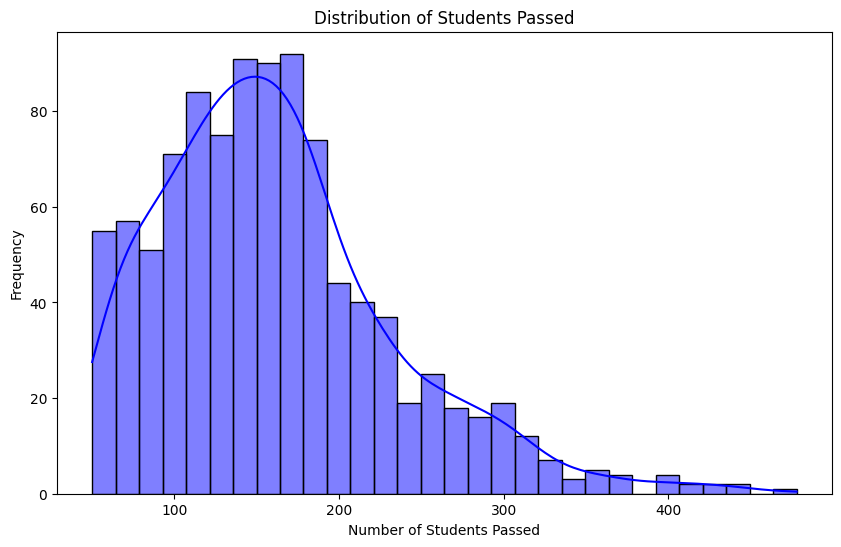

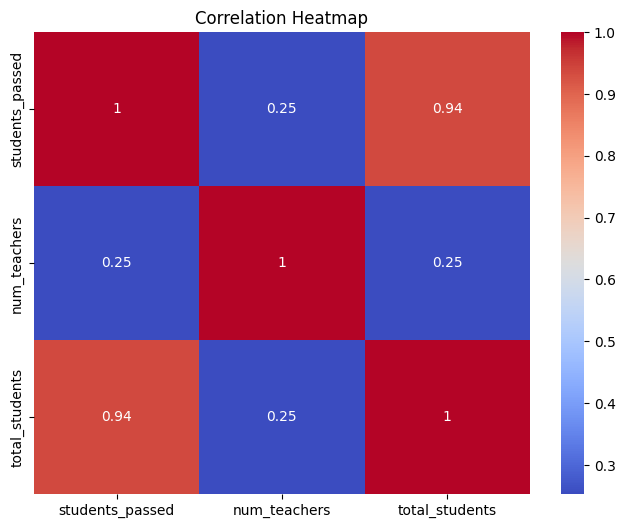

C:\Users\USER\AppData\Local\Temp\ipykernel_2520\2987744123.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='district_label', data=df, palette='viridis')


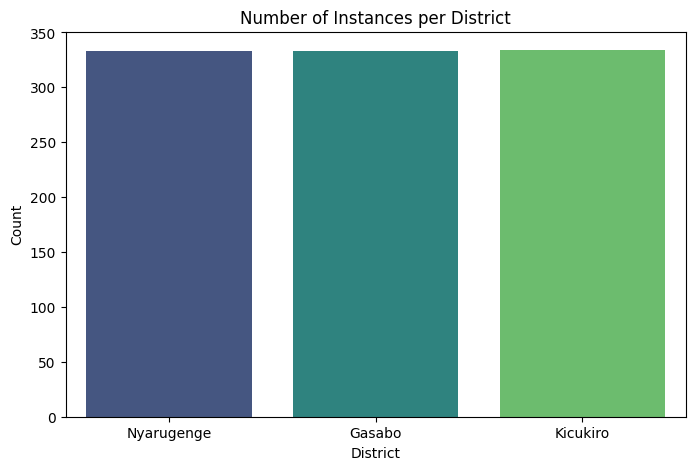

In [7]:
#Include plots for EDA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['students_passed'], bins=30, kde=True, color='blue')
plt.title('Distribution of Students Passed')
plt.xlabel('Number of Students Passed')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='district_label', data=df, palette='viridis')
plt.title('Number of Instances per District')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()



### **4. Hypothesis Testing:**
- **Preexisting Hypotheses**:
  1. Districts with a higher number of teachers tend to have a greater number of students passing exams.
  2. Larger districts (measured by `total_students`) perform better overall.
  3. There is a significant relationship between `students_passed` and the `district_label` (i.e., districts differ in performance).

- **Methodologies**:
  - Perform **Pearson correlation analysis** to assess relationships between `students_passed`, `num_teachers`, and `total_students`.
  - Use visualizations like boxplots to examine differences across districts.


### **5. Handling Sparse/Dense Data and Outliers:**
   - **Density Assessment**:
  - The dataset is dense, with no missing values but potential outliers in `num_teachers` and `students_passed`.

- **Strategies**:
  1. **Missing Data**: Use imputation techniques (e.g., mean/mode) if any missing values are identified in future data additions.
  2. **Outliers**:
     - Use the interquartile range (IQR) method to detect and remove extreme values in numerical features.
     - Visualize feature distributions to decide whether outliers should be handled or retained (e.g., retaining meaningful extreme values for larger districts).

  

### 6. **Data Splitting:**
- Methodology:
Split the dataset into:
Training Set: 70% of the data to train the model.
Validation Set: 15% to fine-tune hyperparameters and prevent overfitting.
Test Set: 15% to evaluate model performance on unseen data.

### 7. **Bias Mitigation:**
- Techniques:
Class Imbalance: Use oversampling if districts are underrepresented in the dataset.
Feature Scaling: Normalize features to prevent any single feature (e.g., total_students) from dominating the model.
   
    **Your answer for Hypothesis Testing goes here **



In [8]:
from sklearn.model_selection import train_test_split

X = df[['students_passed', 'num_teachers', 'total_students']]
y = df['district_label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape}, Validation set size: {X_val.shape}, Test set size: {X_test.shape}")


Training set size: (700, 3), Validation set size: (150, 3), Test set size: (150, 3)


### **8. Features for Model Training:**
- **Relevant Features**: 
  1. `students_passed`
  2. `num_teachers`
  3. `total_students`
- **Feature Ranking**: Use feature importance analysis (e.g., from a Random Forest model) to rank features based on their contribution to predicting `district_label`.


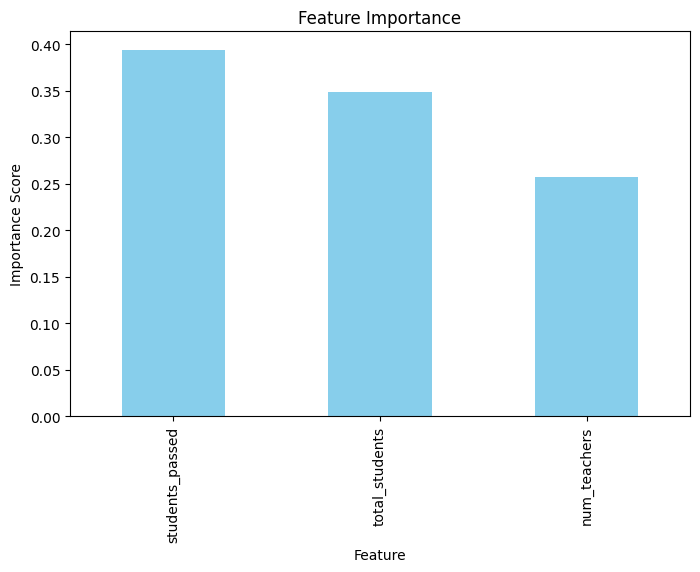

In [9]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestClassifier(random_state=42) # random forest classifier to get feature importances
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.show()



### **9. Types of Data Handling:**
- **Data Types**:
  - **Numerical**: `students_passed`, `num_teachers`, `total_students`
  - **Categorical**: `district_label` which is the targt

- **Planned Preprocessing Steps**:
  1. **Numerical Data**:
     - Standardize using z-score normalization or min-max scaling to ensure uniformity across features.
  2. **Categorical Data**:
     - Encode the target label using label encoding for compatibility with machine learning models.


In [10]:


from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Numerical features scaled and target encoded.")



Numerical features scaled and target encoded.



### 10. **Data Transformation for Modeling:**
- Specify methods for transforming raw data into a model-friendly format
    1. Scaling the data using standard scaler or a min max scaler\
    2. Encoding `district_labels` to a numerical format
- Detail steps for normalization, scaling, or encoding categorical variables.

### 11. **Data Storage:**
- Store processed data locally as a CSV file for quick access during training and validation.
- refer to step one where we saved data in a csv file

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.